# Machine Learning Code
<div style="position: relative; padding-bottom: 62.5%; height: 0;"><iframe src="https://www.loom.com/embed/90fe85ea2b074e9dbc48e3cb023b0c2d" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;"></iframe></div>

```{jupyter-info}
{rel-data-download}`homes.csv`
```

Before we begin, let's put a word of caution about how to approach learning these libraries:
> Trying to memorize all of these function calls and patterns is a ridiculous task. We will throw a lot of new functions at you very quickly and the intent is not for you to be able to memorize them all. The more important thing is to understand how to use them as examples and **adapt** those examples to the problem you are trying to solve. 
>
> The most important thing is to understand the big ideas we highlight about the code we are showing!

This means we won't always be able to explain every bit of code. The purpose is to give you some examples that you can run for your own projects or homeworks, even if you don't have the hundreds of pages of documentation memorized (because no one acually does that!).


## Machine Learning
So far, everything has been awfully abstract and high level. In this notebook, hopefully we can make things more concrete by tying the terms we introduced in the last slide to specific pieces of code to actually train a model. In the next slide, we will introduce the specifics of what this model is learning and how it learns!

For this notebook, we will use a dataset about homes in either San Francisco or New York[1]. This dataset has a row for each house, and some various attributes of the house like which city it's in, its elevation, and the year it was built. 

> *[1]  This data was provided by [R2D3](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) and has been slightly modified to fit our course. Please see [the original source](https://github.com/jadeyee/r2d3-part-1-data/blob/master/part_1_data.csv) for licensing information.*

Now, let's load in this dataset and train a machine learning model to predict the city from the features! 

In [2]:
import pandas as pd

data = pd.read_csv('homes.csv')

data.head()

,beds,bath,price,year_built,sqft,price_per_sqft,elevation,city
0,2.0,1.0,999000,1960,1000,999,10,NY
1,2.0,2.0,2750000,2006,1418,1939,0,NY
2,2.0,2.0,1350000,1900,2150,628,9,NY
3,1.0,1.0,629000,1903,500,1258,9,NY
4,0.0,1.0,439000,1930,500,878,10,NY


To train a machine learning model, we will use the popular library scikit-learn (`sklearn`). `sklearn` has functions to train and evaluate machine learning models. You'll see that like `seaborn`, you won't end up writing a ton of code to train a model which makes `sklearn` very convenient to use!

In the last slide, we introduced two questions we have to ask ourselves when applying an ML task.

1. **What is your data?** Do you have a good set of labeled data to train on? What are the features? What are the labels?
    * **Features**: All of the columns that describe the house (all but `city`).
    * **Labels**: We want to predict which city a house is in from the features, so `city` is the column that describes that.
2. **What are you trying to model?** Is this a regression task or a classification task? What model will you apply for that particular task?
    * This is a **classification** task since we are predicting SF or NY.
    * We haven't described possible models yet, so we skip this part of the question for now.



## Preparing Data
So then the first step in training an ML model, is preparing the data so the model can use it.

We start by separating the data into its features and its labels. Notice we are able to also use masking for the columns we want in `pandas`! This is a succinct way to keep all the columns that aren't the label we want to predict (`'city'`).

In [3]:
features = data.loc[:, data.columns != 'city']
labels = data['city']

We can then look at the features we will use.

In [4]:
features

,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,2.0,1.0,999000,1960,1000,999,10
1,2.0,2.0,2750000,2006,1418,1939,0
2,2.0,2.0,1350000,1900,2150,628,9
3,1.0,1.0,629000,1903,500,1258,9
4,0.0,1.0,439000,1930,500,878,10
...,...,...,...,...,...,...,...
487,5.0,2.5,1800000,1890,3073,586,76
488,2.0,1.0,695000,1923,1045,665,106
489,3.0,2.0,1650000,1922,1483,1113,106
490,1.0,1.0,649000,1983,850,764,163


And then also the labels.

In [5]:
labels

0      NY
1      NY
2      NY
3      NY
4      NY
       ..
487    SF
488    SF
489    SF
490    SF
491    SF
Name: city, Length: 492, dtype: object

In the cell below, we import a class from `sklearn` that represents a type of model called a **decision tree**. The syntax will look a little different than we have seen before since it uses this feature of Python called classes and objects (our topic of study next week). 

We won't explain quite yet what a decision tree is doing, but just treat it like that green plane that separates the cats/dog images from our intro slide (although it will use a slightly different way of separating our SF/NY houses).

In [6]:
# Import the model
from sklearn.tree import DecisionTreeClassifier

# Create an untrained model
model = DecisionTreeClassifier()

# Train it on our training data
model.fit(features, labels)

DecisionTreeClassifier()

Now that we have trained the model, we can now use it to make predictions about new examples! We use the `predict` function on this `model` to make a prediction for some examples. Since there are nearly 500 houses in this dataset, we make the predictions on a few specified rows and compare th prediction with the label from the original dataset. 

In [7]:
predictions = model.predict(features.loc[::80])
print('Predictions:', predictions)
actual_labels = labels.loc[::80]
print('Actual     :', actual_labels.values)  # To get it to print out the same way

Predictions: ['NY' 'NY' 'NY' 'SF' 'SF' 'SF' 'SF']
Actual     : ['NY' 'NY' 'NY' 'SF' 'SF' 'SF' 'SF']


That looks pretty good! It looks like it is able to accurately make predictions for those examples (since they match the true labels).

`sklearn` also provides an function called `accuracy_score` to evaluate how well a model is doing on some dataset. This only works for classification problems, and it returns the percentage of examples the model predicted correctly! You give it both the true labels and the predicted labels, and it computes this accuracy score for you. Accuracy scores will be any number between:
* 0, meaning your model predicted 0% of the labels correctly
* 1.0, meaning your model correctly predicted all labels

In [8]:
from sklearn.metrics import accuracy_score

predictions = model.predict(features)
accuracy_score(labels, predictions)

1.0

Wow! We are able to get 100% of the examples correct! 🎉 Congrats! I guess we have now fully solved ML! 

Unfortunately, it turns out that evaluating a model will be a little trickier than this and that we probably shouldn't expect that this model will get every example it sees in the future correct. How to better assess the models we learn will be the focus of Lesson 12.

## Visualizing The Model
Before we go on to the next slide that explains what this decision tree classifier is, we will quickly show that `sklearn` provides a way of visualizing what this decision tree looks like!  The function `plot_tree` is not important to understand as it has to use a few advanced library features to get the image to display nicely. You can click on the image to enlarge it.

The next slide talks about how this tree is learned and how you might interpret the output of this image.

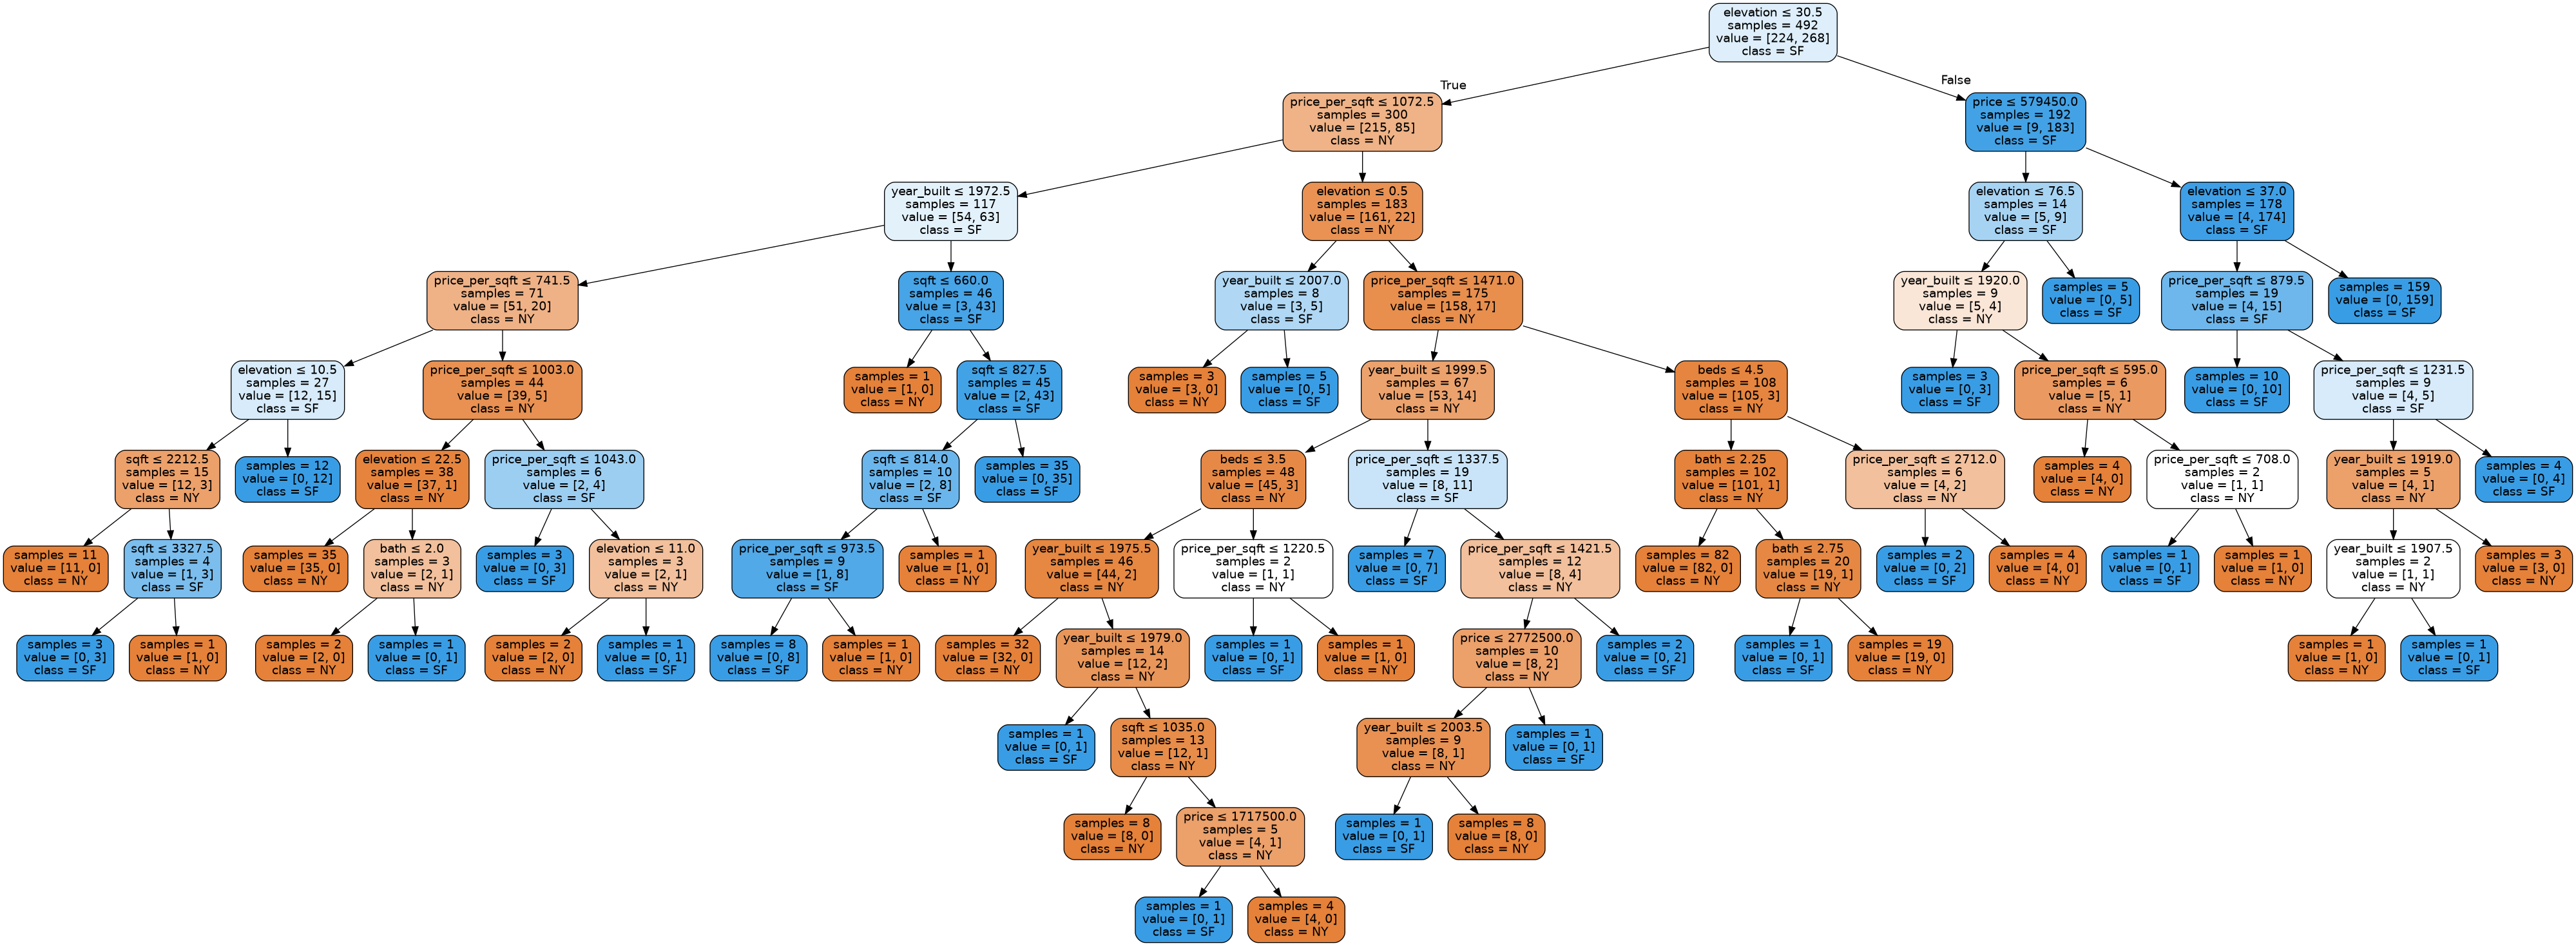

In [24]:
from IPython.display import Image, display

import graphviz 
from sklearn.tree import export_graphviz


def plot_tree(model, features, labels):
    dot_data = export_graphviz(model, out_file=None, 
            feature_names=features.columns,  
            class_names=labels.unique(),
            impurity=False,
            filled=True, rounded=True,  
            special_characters=True) 
    graphviz.Source(dot_data).render('tree.gv', format='png')
    display(Image(filename='tree.gv.png'))


plot_tree(model, features, labels)

## Recap
We introduced a lot of new concepts and code fragments on this slide. For a quick recap, here are all the "important" bits to train an ML model for this task.

In [3]:
# Impot pandas
import pandas as pd
# Import the model
from sklearn.tree import DecisionTreeClassifier
# Import the function to compute accuracy
from sklearn.metrics import accuracy_score

# Read in data
data = pd.read_csv('homes.csv')

# Separate data into features and labels
features = data.loc[:, data.columns != 'city']
labels = data['city']

# Create an untrained model
model = DecisionTreeClassifier()
# Train it on our training data
model.fit(features, labels)

# Make predictions on the data
predictions = model.predict(features)
# Assess the accuracy of the model
accuracy_score(labels, predictions)

1.0